In [1]:
import xarray as xr

In [113]:
ds = xr.open_dataset('/u/trappist-r0/govorcin/01_OPERA/HRES/opera_tropo-1/tests/data/test_data.nc')

In [55]:
hres_model = HRES()

In [62]:
hres_model.__dict__

{'_k1': 0.776,
 '_k2': 0.233,
 '_k3': 3750.0,
 '_humidityType': 'q',
 '_a': [0.0,
  2.00036502,
  3.10224104,
  4.66608381,
  6.82797718,
  9.74696636,
  13.6054239,
  18.6089306,
  24.9857178,
  32.9857101,
  42.8792419,
  54.9554634,
  69.5205765,
  86.8958817,
  107.415741,
  131.425507,
  159.279404,
  191.338562,
  227.968948,
  269.539581,
  316.420746,
  368.982361,
  427.592499,
  492.616028,
  564.413452,
  643.339905,
  729.744141,
  823.967834,
  926.34491,
  1037.20117,
  1156.85364,
  1285.61035,
  1423.77014,
  1571.62292,
  1729.44897,
  1897.51929,
  2076.09595,
  2265.43164,
  2465.77051,
  2677.34814,
  2900.39136,
  3135.11938,
  3381.74365,
  3640.46826,
  3911.49048,
  4194.93066,
  4490.81738,
  4799.14941,
  5119.89502,
  5452.99072,
  5798.34473,
  6156.07422,
  6526.94678,
  6911.87061,
  7311.86914,
  7727.41211,
  8159.354,
  8608.52539,
  9076.40039,
  9562.68262,
  10065.9785,
  10584.6318,
  11116.6621,
  11660.0674,
  12211.5479,
  12766.873,
  13324.6689

In [65]:
hres_model._zlevels.shape

(145,)

In [73]:
import unittest
import pickle

In [78]:
class TestCompareDicts(unittest.TestCase):
    def setUp(self):
        # Set up dictionaries with specified keys and values for testing
        with open('/u/trappist-r0/govorcin/01_OPERA/HRES/opera_tropo-1/tests/data/hres_model.pkl', 'rb') as file:
            self.dict1 =  pickle.load(file) 
        self.dict2 = HRES().__dict__

    def test_compare_dicts(self):
        # The list of keys we are interested in for comparison
        keys = [
            '_k1', '_k2', '_k3', '_humidityType', '_a', '_b', 
            '_model_level_type', '_R_v', '_R_d', '_g0', '_zmin', 
            '_zmax', '_zlevels'
        ]
        
        for key in keys:
            with self.subTest(key=key):
                # Check if key exists in both dictionaries
                self.assertIn(key, self.dict1, f"Key {key} not found in dict1")
                self.assertIn(key, self.dict2, f"Key {key} not found in dict2")
                
                # Compare the values for each key
                self.assertEqual(self.dict1[key], self.dict2[key], f"Values for key '{key}' do not match")

In [90]:
class TestRaiderHRES(unittest.TestCase):
    def setUp(self):
        # Load the golden hres model dict from the file once and initialize the HRES model
        with open('/u/trappist-r0/govorcin/01_OPERA/HRES/opera_tropo-1/tests/data/hres_model.pkl', 'rb') as file:
            self.golden_dict = pickle.load(file)
        
        self.hres_model = HRES()
        self.model_dict = self.hres_model.__dict__

    def test_compare_dicts(self):
        # The list of keys we are interested in for comparison
        keys = [
            '_k1', '_k2', '_k3', '_humidityType', '_a', '_b', 
            '_model_level_type', '_R_v', '_R_d', '_g0', '_zmin', 
            '_zmax', '_zlevels'
        ]
        
        for key in keys:
            with self.subTest(key=key):
                # Check if key exists in both dictionaries
                self.assertIn(key, self.golden_dict, f"Key '{key}' not found in golden_dict")
                self.assertIn(key, self.model_dict, f"Key '{key}' not found in model_dict")
                
                # Get the values for the key
                golden_value = self.golden_dict[key]
                model_value = self.model_dict[key]
                
                # Handle comparison if values are arrays or lists
                if isinstance(golden_value, np.ndarray) and isinstance(model_value, np.ndarray):
                    self.assertTrue(np.array_equal(golden_value, model_value), 
                                    f"Values for key '{key}' do not match: golden_dict = {golden_value}, model_dict = {model_value}")
                else:
                    self.assertEqual(golden_value, model_value, 
                                     f"Values for key '{key}' do not match: golden_dict = {golden_value}, model_dict = {model_value}")


In [95]:
import pickle
import pytest
import numpy as np
from RAiDER.models import HRES


@pytest.fixture
def load_model_and_dict():
    # Load the golden hres model dict from the file once
    with open('data/hres_model.pkl', 'rb') as file:
        golden_dict = pickle.load(file)
    
    # Initialize the HRES model
    hres_model = HRES()
    model_dict = hres_model.__dict__
    
    return golden_dict, model_dict


@pytest.mark.parametrize("key", [
    '_k1', '_k2', '_k3', '_humidityType', '_a', '_b', 
    '_model_level_type', '_R_v', '_R_d', '_g0', '_zmin', 
    '_zmax', '_zlevels'
])
def test_compare_dicts(load_model_and_dict, key):
    golden_dict, model_dict = load_model_and_dict
    
    # Check if key exists in both dictionaries
    assert key in golden_dict, f"Key '{key}' not found in golden_dict"
    assert key in model_dict, f"Key '{key}' not found in model_dict"
    
    # Get the values for the key
    golden_value = golden_dict[key]
    model_value = model_dict[key]
    
    # Handle comparison if values are arrays or lists
    if isinstance(golden_value, np.ndarray) and isinstance(model_value, np.ndarray):
        assert np.array_equal(golden_value, model_value), \
            f"Values for key '{key}' do not match: golden_dict = {golden_value}, model_dict = {model_value}"
    else:
        assert golden_value == model_value, \
            f"Values for key '{key}' do not match: golden_dict = {golden_value}, model_dict = {model_value}"


In [104]:
TEST_DATA = 'data/test.nc'
PRESSURE = 'data/pressure.npy'
HGT = 'data/pressure.npy' 

# Load data
@pytest.fixture
def load_data():
    ds = xr.open_dataset(TEST_DATA)
    gold_pres = np.load(PRESSURE)
    gold_hgt = np.load(HGT)
    
    # Initialize HRES model and extract necessary values
    hres_model = HRES()
    hres_model._t = ds.t.isel(time=0).values
    hres_model._q = ds.q.isel(time=0).values

    return hres_model, ds, gold_pres, gold_hgt

In [101]:
def test_raider_geoh(load_data):
    hres_model, ds, gold_pres, gold_hgt = load_data

    # Perform the calculation
    _, pres, hgt = hres_model._calculategeoh(
        ds.z.isel(time=0, level=0).values,
        ds.lnsp.isel(time=0, level=0).values
    )

    # Check if results match the golden data
    np.testing.assert_array_almost_equal(pres, gold_pres)
    np.testing.assert_array_almost_equal(hgt, gold_hgt)

In [100]:
dd = load_data

In [67]:
import pickle

with open('/u/trappist-r0/govorcin/01_OPERA/HRES/opera_tropo-1/tests/data/hres_model.pkl', 'wb') as file:
    pickle.dump(hres_model.__dict__, file)

In [114]:
from RAiDER.models import HRES

hres_model = HRES()

# Extract temperature and specific humidity at the first time step
hres_model._t = ds.t.isel(time=0).values
hres_model._q = ds.q.isel(time=0).values

_, pres, hgt = hres_model._calculategeoh(
        ds.z.isel(time=0, level=0).values,
        ds.lnsp.isel(time=0, level=0).values
)


In [115]:
np.save('/u/trappist-r0/govorcin/01_OPERA/HRES/opera_tropo-1/tests/data/hgt.npy', hgt)

In [116]:
hgt

array([[[ 7.9832102e+04,  7.9829742e+04,  7.9828984e+04, ...,
          7.9806844e+04,  7.9806016e+04,  7.9807758e+04],
        [ 7.9827664e+04,  7.9824758e+04,  7.9824031e+04, ...,
          7.9801086e+04,  7.9804898e+04,  7.9804188e+04],
        [ 7.9821086e+04,  7.9822031e+04,  7.9822688e+04, ...,
          7.9797406e+04,  7.9799500e+04,  7.9799492e+04],
        ...,
        [ 7.8850867e+04,  7.8849789e+04,  7.8852305e+04, ...,
          7.9034406e+04,  7.9034164e+04,  7.9033094e+04],
        [ 7.8848641e+04,  7.8850023e+04,  7.8851547e+04, ...,
          7.9033203e+04,  7.9031672e+04,  7.9032922e+04],
        [ 7.8847023e+04,  7.8851492e+04,  7.8850289e+04, ...,
          7.9034445e+04,  7.9031422e+04,  7.9034547e+04]],

       [[ 7.4353820e+04,  7.4349758e+04,  7.4347422e+04, ...,
          7.4302625e+04,  7.4300844e+04,  7.4301633e+04],
        [ 7.4349906e+04,  7.4345086e+04,  7.4342680e+04, ...,
          7.4293570e+04,  7.4296430e+04,  7.4295203e+04],
        [ 7.4343961e+04, 

In [45]:
test this things         # Perform RAiDER computations
        hres_model._find_e()  # Compute partial pressure of water vapor
        hres_model._uniform_in_z(_zlevels=None)

        hres_model._checkForNans()
        hres_model._get_wet_refractivity()
        hres_model._get_hydro_refractivity()
        hres_model._adjust_grid(hres_model.get_latlon_bounds())

        # Compute zenith delays at the weather model grid nodes
        hres_model._getZTD()

In [51]:
np.testing.assert_array_almost_equal(np.load('/u/trappist-r0/govorcin/01_OPERA/HRES/opera_tropo-1/tests/data/pressure.npy'), pres)

AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 11049872 / 11049872 (100%)
Max absolute difference: 1.0009766
Max relative difference: 0.49990878
 x: array([[[1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,...
 y: array([[[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,...

In [49]:
np.load('/u/trappist-r0/govorcin/01_OPERA/HRES/opera_tropo-1/tests/data/pressure.npy')

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[2.00036502e+00, 2.00036502e+00, 2.00036502e+00, ...,
         2.00036502e+00, 2.00036502e+00, 2.00036502e+00],
        [2.00036502e+00, 2.00036502e+00, 2.00036502e+00, ...,
         2.00036502e+00, 2.00036502e+00, 2.00036502e+00],
        [2.00036502e+00, 

In [25]:
hydro = ds.hydrostatic_delay.isel(time=0).sel(height=500, method='nearest')
wet = ds.wet_delay.isel(time=0).sel(height=500, method='nearest')

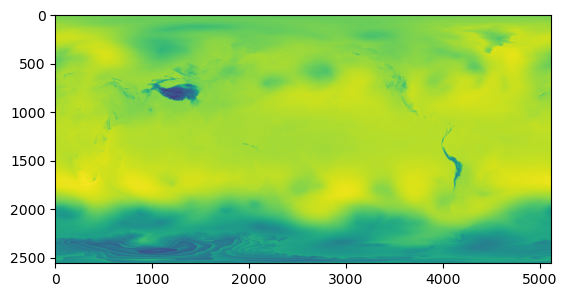

In [32]:
plt.imshow(hydro.data)

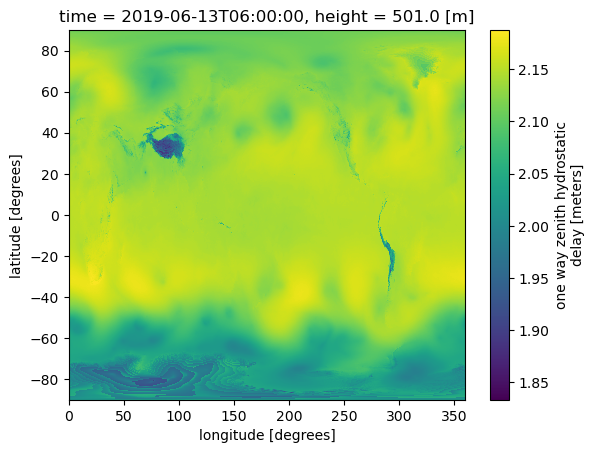

In [33]:
hydro.plot.imshow()

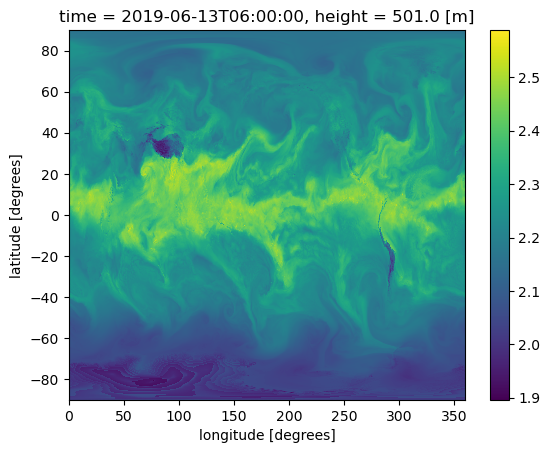

In [26]:
(hydro + wet).plot.imshow()

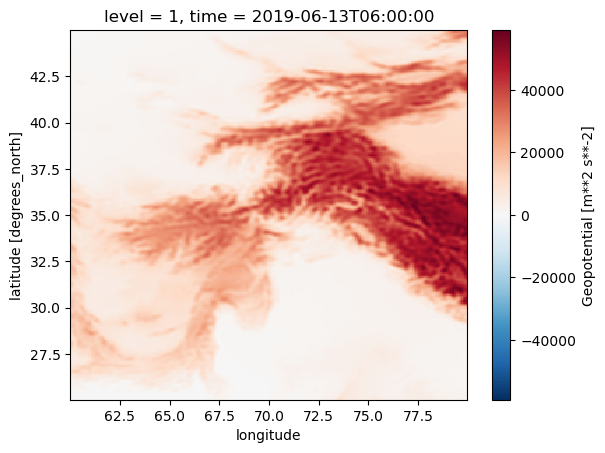

In [21]:

ds.z.isel(time=0, 
          level=0).plot.imshow()